<a href="https://colab.research.google.com/github/Elish-Ab/AI-Mastery-10x-Week1/blob/task-2/Task2_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_opencl.so.0 is not a symbolic lin

In [2]:
!pip install pynance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import pynance as pn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the historical stock data
data = pd.read_csv('AMZN_historical_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [5]:
# Calculate technical indicators using TaLib
data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['MACD'], data['MACD_signal'], _ = talib.MACD(data['Close'])

In [8]:
# Fetch stock data using PyNance
stock_data = pn.data.get('AMZN')

# Calculate moving averages using TA-Lib
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)

# Calculate RSI using TA-Lib
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)


# Calculate MACD using TA-Lib
stock_data['macd'], stock_data['macd_signal'], stock_data['macd_hist'] = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

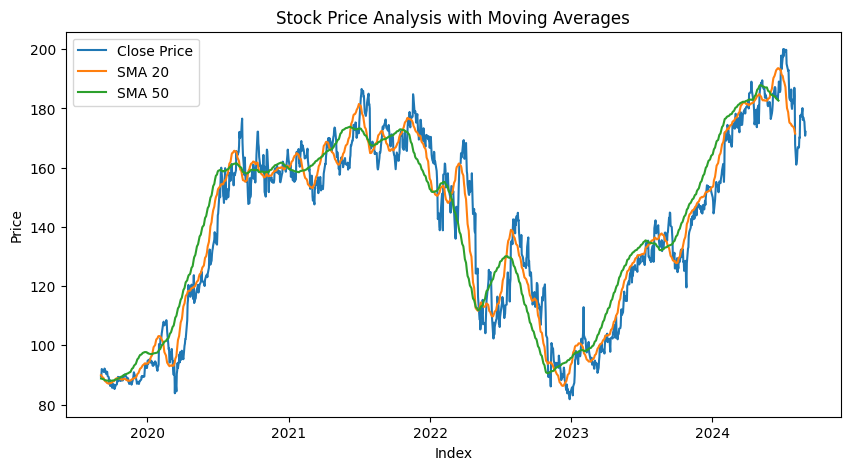

In [10]:
# Visualize the data with the index as x-axis
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data.index, stock_data['SMA_50'], label='SMA 50')
plt.legend()
plt.title('Stock Price Analysis with Moving Averages')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

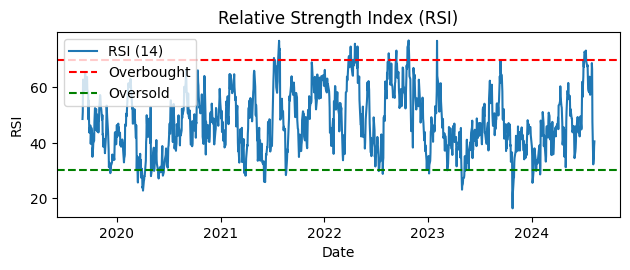

In [11]:
# Plotting RSI
plt.subplot(2, 1, 2)
plt.plot(stock_data.index, stock_data['RSI_14'], label='RSI (14)')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold')
plt.legend()
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'MACD')

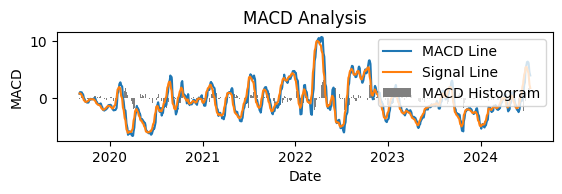

In [12]:
# Plotting MACD and Signal line
plt.subplot(3, 1, 2)
plt.plot(stock_data.index, stock_data['macd'], label='MACD Line')
plt.plot(stock_data.index, stock_data['macd_signal'], label='Signal Line')
plt.bar(stock_data.index, stock_data['macd_hist'], label='MACD Histogram', color='gray')
plt.legend()
plt.title('MACD Analysis')
plt.xlabel('Date')
plt.ylabel('MACD')